# Employee Attrition Analysis

### Employee attrition analysis is a type of behavioural analysis where we study the behaviour and characteristics of the employees who left the organization and compare their characteristics with the current employees to find the employees who may leave the organization soon.


A high rate of attrition of employees can be expensive for any company in terms of recruitment and training costs, loss of productivity and morale reduction of employees. By identifying the causes of attrition, a company can take measures to reduce the attrition of employees and maintain precious employees.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("D:\\Dataset\\Attrition.csv")

In [3]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [7]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
attr_df = df[df["Attrition"] == "Yes"]
attr_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,1,80,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,...,2,80,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,...,4,80,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6,3,0,1


In [10]:
attrition_by_dpt = attr_df.groupby(["Department"]).size().reset_index(name="count")
attrition_by_dpt

,Department,count
0,Human Resources,12
1,Research & Development,133
2,Sales,92


In [16]:
# x = df["Department"].value_counts().reset_index()
# x

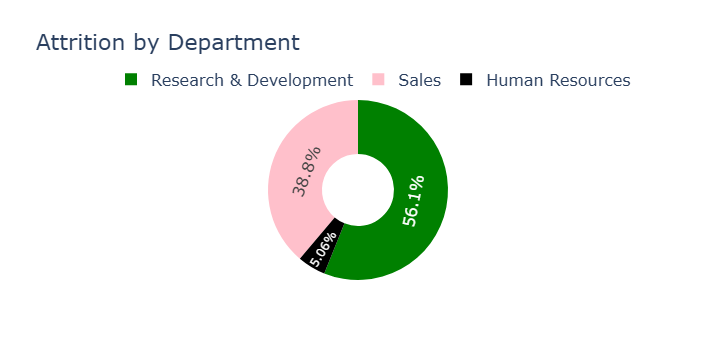

In [34]:
attrition_by = attr_df.groupby(["Department"]).size().reset_index(name = "Count")

fig = go.Figure(
    data=[go.Pie(
        labels = attrition_by["Department"],
        values = attrition_by["Count"],
        hole = 0.4,
        marker = dict(colors=["black", "green", "pink"]),
        textposition = "inside"    # outside
    )]
)

fig.update_layout(
    title = "Attrition by Department",
    font = dict(size=16),
    legend = dict(
        orientation = "h",
        yanchor = "bottom", # top
        y = 1.02,
        xanchor = "right",    # left
        x = 1
    )
)

fig.show()

In [40]:
# we can see that the research & development department has a high attrition rate.
# Now lets have a look at the persentage of attrition by education field

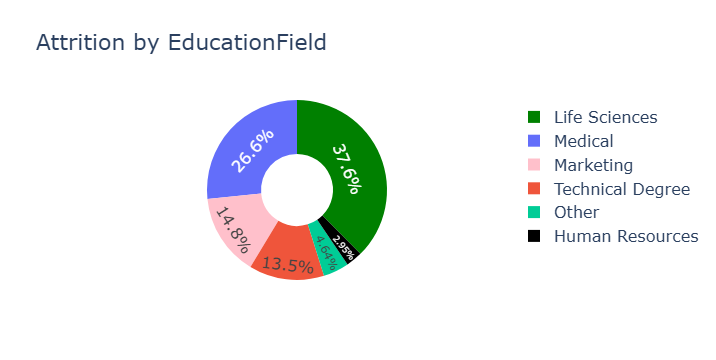

In [39]:
attrition_by = attr_df.groupby(["EducationField"]).size().reset_index(name = "Count")

fig = go.Figure(
    data=[go.Pie(
        labels = attrition_by["EducationField"],
        values = attrition_by["Count"],
        hole = 0.4,
        marker = dict(colors=["black", "green", "pink"]),
        textposition = "inside"    # outside
    )]
)

fig.update_layout(
    title = "Attrition by EducationField",
    font = dict(size=16),
    legend = dict(
        orientation = "h",
        yanchor = "top", # top
        y = 1,
        xanchor = "left",    # left
        x = 1
    )
)

fig.show()

### We can see that the employees with Life Sciences as an education field have a high attrition rate. Now let's have a look at the percentage of attrition by number of years at the company

In [42]:
attrition_by = attr_df.groupby(["YearsAtCompany"]).size().reset_index(name = "Count")
attrition_by

,YearsAtCompany,Count
0,0,16
1,1,59
2,2,27
3,3,20
4,4,19
5,5,21
6,6,9
7,7,11
8,8,9
9,9,8


### We can see that most of the employees Leave the organization after completing a year.

In [43]:
attrition_by = attr_df.groupby(["YearsSinceLastPromotion"]).size().reset_index(name = "Count")
attrition_by

,YearsSinceLastPromotion,Count
0,0,110
1,1,49
2,2,27
3,3,9
4,4,5
5,5,2
6,6,6
7,7,16
8,9,4
9,10,1


### We can see that the employees who don't get promotions leave the organization more compared to the employees who got promotions. Now let's have a look at the percentage of attrition by gender:

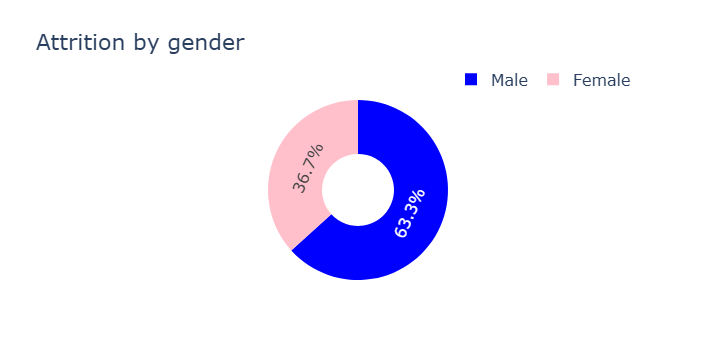

In [45]:
attrition_by = attr_df.groupby(["Gender"]).size().reset_index(name = "Count")

fig = go.Figure(
    data=[go.Pie(
        labels = attrition_by["Gender"],
        values = attrition_by["Count"],
        hole = 0.4,
        marker = dict(colors=["pink", "blue"]),
        textposition = "inside"    # outside
    )]
)

fig.update_layout(
    title = "Attrition by gender",
    font = dict(size=16),
    legend = dict(
        orientation = "h",
        yanchor = "bottom", # top
        y = 1.02,
        xanchor = "right",    # left
        x = 1
    )
)

fig.show()

### Men have a high attrition rate compared to women. Now let's have a look at the attrition by analyzing the relationship between monthly income and the age of the employees:

In [46]:
import plotly.express as px

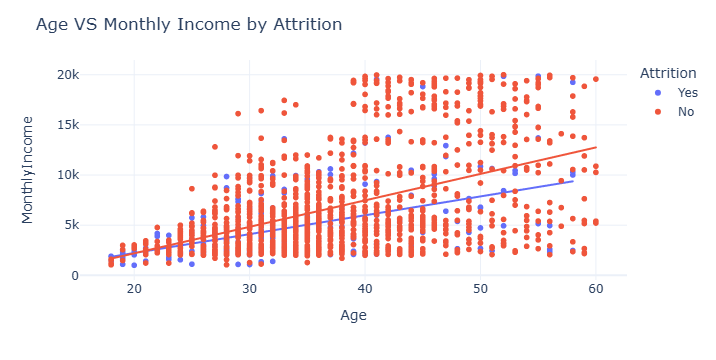

In [48]:
fig = px.scatter(df, x="Age", y="MonthlyIncome", color="Attrition", trendline="ols")     # Ordinary least squares


fig.update_layout(title="Age VS Monthly Income by Attrition")

fig.show()